In [ ]:
# use ?fo=json to get metadata of the item

In [19]:
import io
import pandas as pd                     # for reading, manipulating, and displaying data
import requests
from helpers_loc import get_file_stats

DATA_URL = 'https://data.labs.loc.gov/jukebox/' # Base URL of this data package
DATA_URL = 'https://data.labs.loc.gov/veterans-history-project-collection/' # Base URL of this data package

# Download the file manifest
file_manifest_url = f'{DATA_URL}manifest.json'
response = requests.get(file_manifest_url, timeout=60)
response_json = response.json()
# file information json
files = [dict(zip(response_json["cols"], row)) for row in response_json["rows"]] # zip columns and rows

# Convert to Pandas DataFrame and show stats table
stats = get_file_stats(files)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
df = pd.DataFrame(stats)
df

,FileType,Count,Size
0,.mp3,"5,882",17.0GB


In [4]:
metadata_url = f'{DATA_URL}metadata.json'
response = requests.get(metadata_url, timeout=60)
data = response.json()
print(f'Loaded metadata file with {len(data):,} entries.')

Loaded metadata file with 5,882 entries.


In [11]:
df_metadata = pd.DataFrame(data)
print(', '.join(df.columns.to_list()))

Date, Description, Digitized, Id, IIIF_manifest, Preview_url, Audio_type, Contributors, Genre, Language, Media_size, Recording_catalog_number, Date_text, Recording_label, Location_text, Recording_matrix_number, Recording_take_id, Recording_take_number, Rights, Mime_type, Online_format, Original_format, Part_of, Repository, Number_of_files, Shelf_id, Subjects, Last_updated_in_api, Title, Type_of_resource, Url, Source_collection, Location


In [12]:
df_metadata_by_subject = df_metadata.explode('Subjects')
df_opera = df_metadata_by_subject[df_metadata_by_subject.Subjects == 'Opera']
print(f'Found {df_opera.shape[0]:,} items with subject "Opera"')

Found 933 items with subject "Opera"


In [ ]:
# create a DataFrame from the file information
df_files = pd.DataFrame(files)
# join the metadata dataframe with the file information dataframe
opera_set_with_audio = pd.merge(df_opera, df_files, left_on='Id', right_on='item_id', how='inner')
print(f'Found {opera_set_with_audio.shape[0]:,} opera items with audio files')

Found 933 opera items with audio files


In [10]:
opera_set_with_audio.head()

,Date,Description,Digitized,Id,IIIF_manifest,Preview_url,Audio_type,Contributors,Genre,Language,...,Title,Type_of_resource,Url,Source_collection,Location,filename,item_id,md5,size,object_key
0,1917-01-25,"[Victor 10000. Matrix/Take: C-19133/2., Vocal ...",True,http://www.loc.gov/item/jukebox-21582/,http://www.loc.gov/item/jukebox-21582/manifest...,[],Vocal,"[{'Name': 'Egener, Minnie', 'Role': 'Vocalist ...","[Classical music, Opera]",[Italian],...,Sextet (Chi mi frena),Audio,https://www.loc.gov/item/jukebox-21582/,National Jukebox,"[{'Short_name': 'Camden', 'Full_name': 'Camden...",jukebox-21582_1.mp3,http://www.loc.gov/item/jukebox-21582/,88339e787c3638cea7021ba4829da919,3753718,data.labs.loc.gov/jukebox/audio/jukebox-21582_...
1,1908-02-07,"[Vocal sextet (soprano, mezzo-soprano, 2 tenor...",True,http://www.loc.gov/item/jukebox-125974/,http://www.loc.gov/item/jukebox-125974/manifes...,[],Vocal,"[{'Name': 'Daddi, Francesco', 'Role': 'Vocalis...",[Opera],[Italian],...,Sextette : Chi mi frena,Audio,https://www.loc.gov/item/jukebox-125974/,National Jukebox,"[{'Short_name': 'New York', 'Full_name': 'New ...",jukebox-125974_1.mp3,http://www.loc.gov/item/jukebox-125974/,57709719e7b2bc105223ba72234d1fbb,3869074,data.labs.loc.gov/jukebox/audio/jukebox-125974...
2,1912-01-07,"[Victor 10002. Matrix/Take: C-11438/1., Vocal ...",True,http://www.loc.gov/item/jukebox-131319/,http://www.loc.gov/item/jukebox-131319/manifes...,[],Vocal,"[{'Name': 'Caruso, Enrico', 'Role': 'Vocalist ...","[Classical music, Opera]",[Italian],...,Che vuol dir cio,Audio,https://www.loc.gov/item/jukebox-131319/,National Jukebox,"[{'Short_name': 'New York', 'Full_name': 'New ...",jukebox-131319_1.mp3,http://www.loc.gov/item/jukebox-131319/,4f0dcccc96217f7ab3c905b2060a9558,3461982,data.labs.loc.gov/jukebox/audio/jukebox-131319...
3,1910-01-12,"[Victor 10004. Matrix/Take: C-8544/1., Vocal q...",True,http://www.loc.gov/item/jukebox-128347/,http://www.loc.gov/item/jukebox-128347/manifes...,[],Vocal,"[{'Name': 'Farrar, Geraldine', 'Role': 'Vocali...","[Classical music, Opera]",[French],...,Seigneur Dieu!,Audio,https://www.loc.gov/item/jukebox-128347/,National Jukebox,"[{'Short_name': 'New York', 'Full_name': 'New ...",jukebox-128347_1.mp3,http://www.loc.gov/item/jukebox-128347/,7e8f547925d1bb186cb87113d85d4174,4263209,data.labs.loc.gov/jukebox/audio/jukebox-128347...
4,1910-01-12,"[Vocal quartet (soprano, mezzo-soprano, tenor,...",True,http://www.loc.gov/item/jukebox-128360/,http://www.loc.gov/item/jukebox-128360/manifes...,[],Vocal,"[{'Name': 'Farrar, Geraldine', 'Role': 'Vocali...","[Classical music, Opera]",[French],...,"Eh quoi, toujours seule",Audio,https://www.loc.gov/item/jukebox-128360/,National Jukebox,"[{'Short_name': 'New York', 'Full_name': 'New ...",jukebox-128360_1.mp3,http://www.loc.gov/item/jukebox-128360/,bec066f7ab6f06d6a1040718097dd7ed,3806380,data.labs.loc.gov/jukebox/audio/jukebox-128360...


In [14]:
# object_key contains the path to the audio file
import io

import matplotlib.pyplot as plt         # for displaying data
import numpy as np
from pydub import AudioSegment          # for reading and manipulating audio files
from scipy import signal                # for visualizing audio

item = opera_set_with_audio.iloc[0]
file_url = f'https://{item["object_key"]}'

/Users/ac/miniforge3/envs/longtail/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [15]:
# Downoad the audio to memory
response = requests.get(file_url, timeout=60)
audio_filestream = io.BytesIO(response.content)

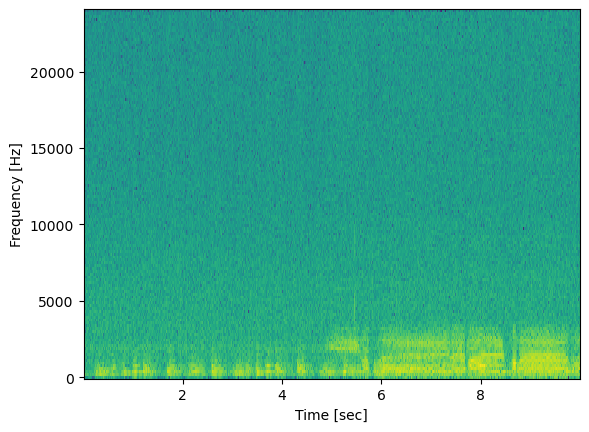

In [18]:
# Read as mp3
sample_rate = 48000
sample_width = 1
channels = 1
audio_filestream.seek(0)  # Ensure stream is at the beginning
sound = AudioSegment.from_mp3(audio_filestream)
sound = sound.set_channels(channels)
sound = sound.set_sample_width(sample_width)
sound = sound.set_frame_rate(sample_rate)

# Get the first 10 seconds
ten_seconds = 10 * 1000
first_10_seconds = sound[:ten_seconds]

# Get audio samples and sample rate
samples = first_10_seconds.get_array_of_samples()
samples = np.array(samples)

# Visualize the results
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
plt.pcolormesh(times, frequencies, np.log(spectrogram))
# plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()